## Analysis script for pilot data (Sato, Schouwstra & Kirby, 2020)

In [22]:
#load libraries
require(ggpubr)
require(ggplot2)
require(lme4)
require(optimx)

#read in data
astradata <- read.csv('ssk_pilot_data.csv')

#check
head(astradata,2)
length(unique(astradata$pID))

Point.Pattern,pID,Condition,Stage,Trial,StimType,Label,MST,Response,Target,MST.LT,Target.LT,Response.LT
ANCHOR,18,ARBITRARY,JOIN,40,NOT_CRITICAL,HOURGLASS,[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN
ANCHOR,18,ARBITRARY,TRAIN2,11,NOT_CRITICAL,HOURGLASS,[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],HOURGLASS,[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,N


[1] 80

## Accuracy guessing labels (training)

In [2]:
astradata$Correct <- ifelse(as.character(astradata$Label) == as.character(astradata$Response), 1,0)
head(astradata,2)

Point.Pattern,pID,Condition,Stage,Trial,StimType,Label,MST,Response,Target,MST.LT,Target.LT,Response.LT,Correct
ANCHOR,18,ARBITRARY,JOIN,40,NOT_CRITICAL,HOURGLASS,[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,0
ANCHOR,18,ARBITRARY,TRAIN2,11,NOT_CRITICAL,HOURGLASS,[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],HOURGLASS,[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,N,1


[1] 0.040625

[1] 0.6

[1] 0.725

[1] 0.95625

Accuracy guessing labels during training

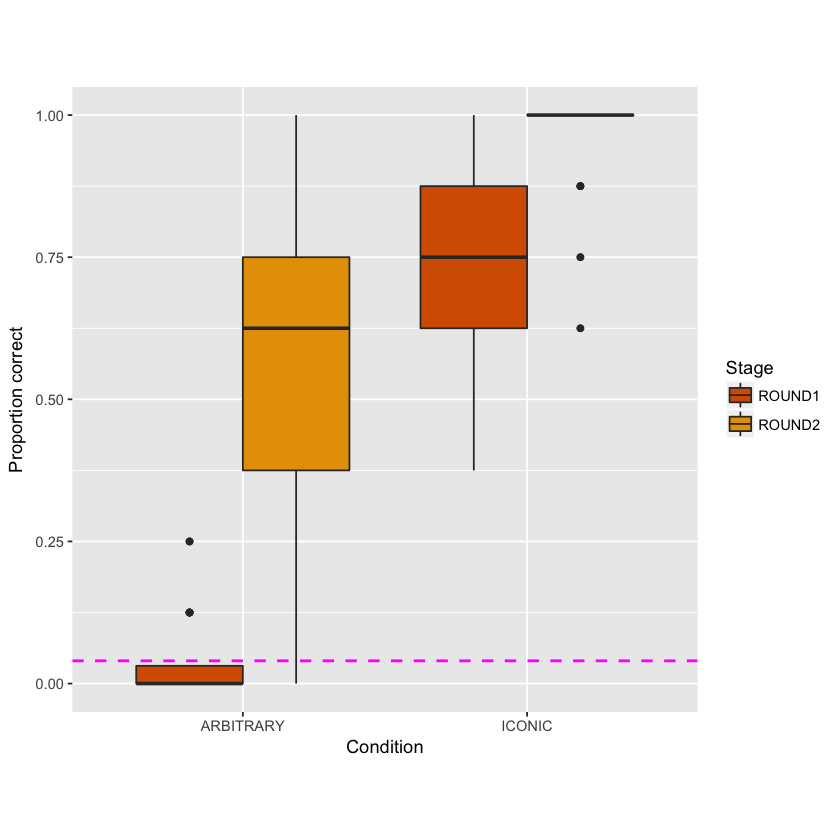

In [3]:
#colorblind palette
cbPalette <- c("#D55E00","#E69F00", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

d <- aggregate(Correct ~ pID + Condition + Stage, data = astradata, FUN = mean)
mean(subset(d, Condition == "ARBITRARY" & Stage == "TRAIN")$Correct)
mean(subset(d, Condition == "ARBITRARY" & Stage == "TRAIN2")$Correct)
mean(subset(d, Condition == "ICONIC" & Stage == "TRAIN")$Correct)
mean(subset(d, Condition == "ICONIC" & Stage == "TRAIN2")$Correct)

levels(d$Stage) <- c("JOIN", "TEST", "ROUND1", "ROUND2")

cat("Accuracy guessing labels during training")
train_plot <- ggplot(subset(d, Stage == "ROUND1" | Stage == "ROUND2"), aes(x = Condition, y = Correct))+scale_fill_manual(values=cbPalette)+ylab("Proportion correct")+xlab("Condition")+geom_hline(yintercept = 0.04, colour = 'magenta', size = 0.8, linetype = "dashed")+geom_boxplot(aes(fill = Stage))+theme(aspect.ratio=1)
train_plot

### Training model

In [4]:
# sum contrast matrix for a categorical variable with 2 levels - everything is compared to the grand mean

traindata <- subset(astradata, Stage == "TRAIN" | Stage == "TRAIN2")
traindata$Stage <- factor(traindata$Stage) #re-factor 

#contr.sum(2)

#assign sum contrasts to condition and stage
contrasts(traindata$Condition) = contr.sum(2)
contrasts(traindata$Stage) = contr.sum(2)

contrasts(traindata$Condition)
contrasts(traindata$Stage)

ARBITRARY,1
ICONIC,-1


TRAIN,1
TRAIN2,-1


In [5]:

#full model
f <- glmer(Correct ~ Condition + Stage + Condition :Stage + (1|pID)+ (1 + Condition|Point.Pattern), traindata,"binomial", control=glmerControl(optimizer ='optimx', optCtrl=list(method='bobyqa')))

#model without interaction
m <- glmer(Correct ~ Condition + Stage + (1|pID)+ (1 + Condition|Point.Pattern), traindata,"binomial", control=glmerControl(optimizer ='optimx', optCtrl=list(method='bobyqa')))

#stage removed
c <- glmer(Correct ~ Condition + (1|pID)+ (1 + Condition|Point.Pattern), traindata,"binomial", control=glmerControl(optimizer ='optimx', optCtrl=list(method='bobyqa')))

#condition removed
s <- glmer(Correct ~ Stage + (1|pID)+ (1 + Condition|Point.Pattern), traindata,"binomial", control=glmerControl(optimizer ='optimx', optCtrl=list(method='bobyqa')))


null <- glmer(Correct ~ (1|pID)+ (1 + Condition|Point.Pattern), traindata,"binomial", control=glmerControl(optimizer ='optimx', optCtrl=list(method='bobyqa')))

summary(f)


cat("Comparison of full model and null model")
anova(f,null)

cat("Main effect of stage?")
anova(m,c)
cat("Main effect of condition?")
anova(m,s) 
cat("Effect of interaction?")
anova(m,f)  

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Correct ~ Condition + Stage + Condition:Stage + (1 | pID) + (1 +  
    Condition | Point.Pattern)
   Data: traindata
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "bobyqa"))

     AIC      BIC   logLik deviance df.resid 
   917.0    958.3   -450.5    901.0     1272 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.1574 -0.1988  0.0621  0.3701  8.0311 

Random effects:
 Groups        Name        Variance Std.Dev. Corr 
 pID           (Intercept) 0.8548   0.9245        
 Point.Pattern (Intercept) 1.0956   1.0467        
               Condition1  0.9550   0.9772   -0.95
Number of obs: 1280, groups:  pID, 80; Point.Pattern, 16

Fixed effects:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)         0.8484     0.3265   2.599  0.00936 ** 
Condition1         -2.3841     0.3178  -7.501 6.32e-14 ***
Stage1

Comparison of full model and null model

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
null,5,1312.052,1337.8249,-651.0259,1302.052,NA,NA,NA
f,8,917.042,958.2789,-450.5210,901.042,401.0099,3,1.337829e-86


Main effect of stage?

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
c,6,1290.0322,1320.9599,-639.0161,1278.0322,NA,NA,NA
m,7,919.2651,955.3474,-452.6326,905.2651,372.7671,1,4.674351e-83


Main effect of condition?

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
s,6,944.2666,975.1943,-466.1333,932.2666,NA,NA,NA
m,7,919.2651,955.3474,-452.6326,905.2651,27.00152,1,2.032958e-07


Effect of interaction?

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
m,7,919.2651,955.3474,-452.6326,905.2651,NA,NA,NA
f,8,917.0420,958.2789,-450.5210,901.0420,4.223157,1,0.0398759


 ## Accuracy guessing labels (recall + guess) (test round)

[1] 0.590625

[1] 0.96875

[1] 0.1125

[1] 0.28125

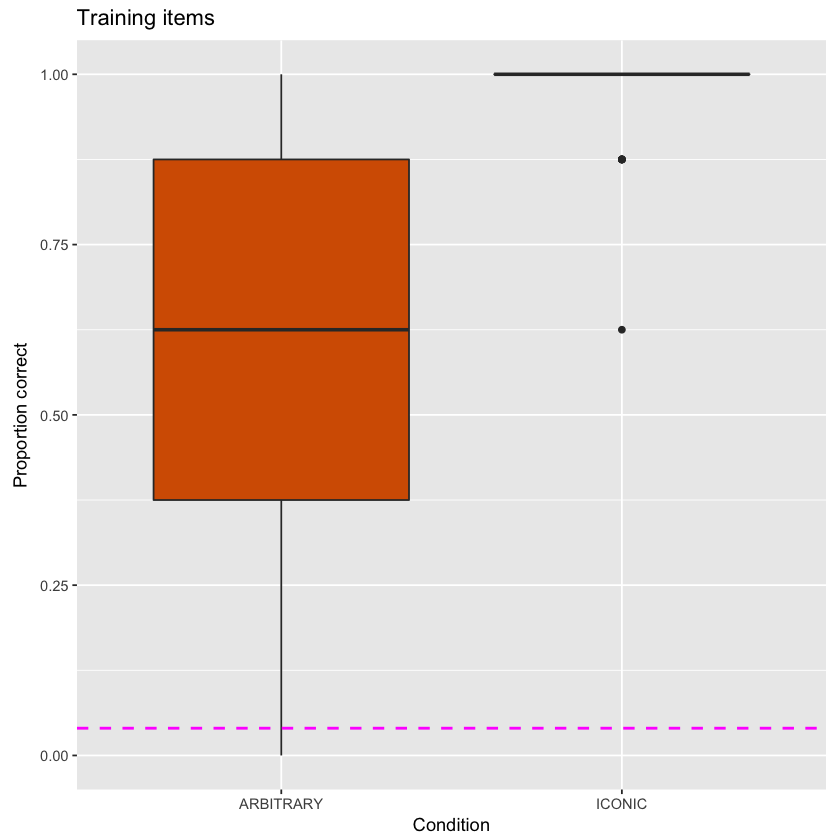

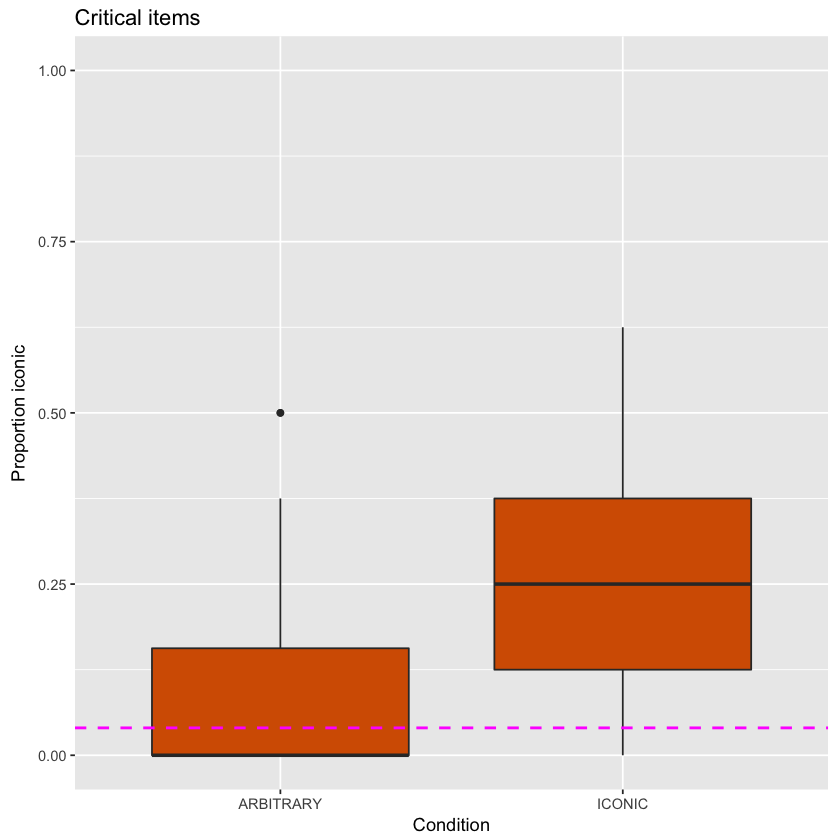

In [6]:
d <- aggregate(Correct ~ pID + Condition + Stage + StimType, data = astradata, FUN = mean)

a <-ggplot(subset(d, Stage == "TEST" & StimType == "NOT_CRITICAL"), aes(x = Condition, y = Correct))+ggtitle("Training items")+xlab("Condition")+ylab("Proportion correct")+scale_fill_manual(values=cbPalette)+geom_boxplot(fill = cbPalette[1])+geom_hline(yintercept = 0.04, colour = 'magenta', size = 0.8, linetype = "dashed")+theme(aspect.ratio=1)
b <-ggplot(subset(d, Stage == "TEST" & StimType == "CRITICAL"), aes(x = Condition, y = Correct))+ggtitle("Critical items")+xlab("Condition")+ylab("Proportion iconic")+ylim(c(0,1))+scale_fill_manual(values=cbPalette)+geom_boxplot(fill = cbPalette[1])+geom_hline(yintercept = 0.04, colour = 'magenta', size = 0.8, linetype = "dashed")+theme(aspect.ratio=1)

mean(subset(d, Condition == "ARBITRARY" & Stage == "TEST"& StimType == "NOT_CRITICAL")$Correct)
mean(subset(d, Condition == "ICONIC" & Stage == "TEST"& StimType == "NOT_CRITICAL")$Correct)

mean(subset(d, Condition == "ARBITRARY" & Stage == "TEST" & StimType == "CRITICAL")$Correct)
mean(subset(d, Condition == "ICONIC" & Stage == "TEST"& StimType == "CRITICAL")$Correct)

a
b

## accuracy at test models

In [7]:
# add sum coding 
testdata <- subset(astradata, Stage == "TEST")

contrasts(testdata$Condition) = contr.sum(2)
#contrasts(testdata$Condition)

### non-critical items (recall)

In [8]:
#non-critical items
m <- glmer(Correct ~ Condition + (1|pID) + (1+Condition|Point.Pattern), subset(testdata, StimType == "NOT_CRITICAL"),family = "binomial")
n <- glmer(Correct ~(1|pID) + (1+Condition|Point.Pattern), subset(testdata, StimType == "NOT_CRITICAL"),family = "binomial")
summary(m)
anova(m,n)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Correct ~ Condition + (1 | pID) + (1 + Condition | Point.Pattern)
   Data: subset(testdata, StimType == "NOT_CRITICAL")

     AIC      BIC   logLik deviance df.resid 
   467.8    494.6   -227.9    455.8      634 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6184  0.0531  0.1026  0.3012  2.0080 

Random effects:
 Groups        Name        Variance Std.Dev. Corr 
 pID           (Intercept) 2.9618   1.7210        
 Point.Pattern (Intercept) 0.2749   0.5243        
               Condition1  0.4529   0.6730   -1.00
Number of obs: 640, groups:  pID, 80; Point.Pattern, 16

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.8519     0.4409   6.468 9.91e-11 ***
Condition1   -2.2762     0.4367  -5.213 1.86e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
   

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
n,5,494.6262,516.9335,-242.3131,484.6262,NA,NA,NA
m,6,467.8068,494.5756,-227.9034,455.8068,28.81941,1,7.945069e-08


### critical items (new)

In [9]:
m <- glmer(Correct ~ Condition + (1|pID) + (1+Condition|Point.Pattern), subset(testdata, StimType == "CRITICAL"),family = "binomial",control = glmerControl(optimizer ='optimx', optCtrl=list(method='bobyqa')))
n <- glmer(Correct ~(1|pID) + (1+Condition|Point.Pattern), subset(testdata, StimType == "CRITICAL"),family = "binomial",control = glmerControl(optimizer ='optimx', optCtrl=list(method='bobyqa')))
summary(m)
anova(m,n)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: Correct ~ Condition + (1 | pID) + (1 + Condition | Point.Pattern)
   Data: subset(testdata, StimType == "CRITICAL")
Control: glmerControl(optimizer = "optimx", optCtrl = list(method = "bobyqa"))

     AIC      BIC   logLik deviance df.resid 
   561.2    588.0   -274.6    549.2      634 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5806 -0.4098 -0.2997 -0.2017  4.2540 

Random effects:
 Groups        Name        Variance Std.Dev. Corr 
 pID           (Intercept) 0.5247   0.7244        
 Point.Pattern (Intercept) 0.7973   0.8929        
               Condition1  0.1312   0.3623   -1.00
Number of obs: 640, groups:  pID, 80; Point.Pattern, 8

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.8483     0.3614  -5.115 3.14e-07 ***
Condition1   -0.5289     0.2038  -2.596  0.00944 ** 
---
Signif. codes:  0 ‘***’

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
n,5,563.9154,586.2228,-276.9577,553.9154,NA,NA,NA
m,6,561.1875,587.9563,-274.5938,549.1875,4.727901,1,0.02967707


## Expectation for iconicity

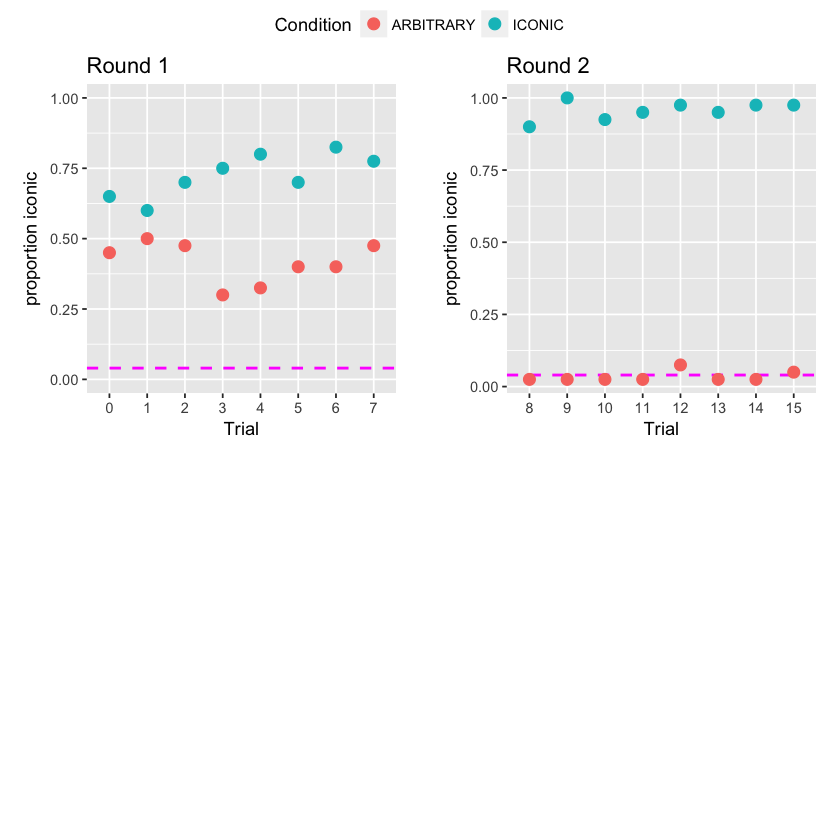

In [10]:
# did participants click on the iconic label at first exposure in both conditions?

astradata$Iconic.choice <- ifelse(as.character(astradata$Point.Pattern) == as.character(astradata$Response), 1,0)

d <- aggregate(Iconic.choice ~  Trial + Stage + Condition, data = astradata, FUN = mean)

a <-ggplot(subset(d, Stage == "TRAIN"), aes(x = as.factor(Trial), y = Iconic.choice))+ ggtitle("Round 1")+ylim(c(0,1))+xlab("Trial")+ylab("proportion iconic")+geom_hline(yintercept = 0.04, colour = 'magenta', size = 0.8, linetype = "dashed")+geom_point(aes(color = Condition),size = 3)+theme(aspect.ratio=1)
b <-ggplot(subset(d, Stage == "TRAIN2"), aes(x = as.factor(Trial), y = Iconic.choice))+ ggtitle("Round 2")+xlab("Trial")+ylab("proportion iconic")+geom_hline(yintercept = 0.04, colour = 'magenta', size = 0.8, linetype = "dashed")+geom_point(aes(color = Condition),size = 3)+theme(aspect.ratio=1)

ggarrange(a,b, cols = 3, rows = 1, common.legend = TRUE)


## Overlap between Empirical Structures and Target Structures

In [11]:
get_overlap <- function(el,tl) { #function takes empirical links and target links as arguments, must be same length
    
    el <- unlist(strsplit(el,"")) #splits into vector
    tl <- unlist(strsplit(tl,""))
    
    if(length(el) != length(tl)) {
        return(NA)
    }
    
    e_links <- 0
    t_links <- 0
    
    overlapping_links <- 0
    
    for( n in seq(1:length(el))){
        
        if(el[n] == 1){
            e_links <- e_links + 1
            if(tl[n] == 1) {
                overlapping_links <- overlapping_links +1
            }
        }
        
        if(tl[n] == 1) {
            t_links <- t_links +1
        }
        
    }
    # x is what percent of y? 
    # overlapping links are what percent of total empirical links
    percent <- 100*overlapping_links/e_links
    return(percent)
    
    print(e_links)
    print(t_links)
    print(overlapping_links)
}

get_overlap <- Vectorize(get_overlap)


In [12]:
#get percentage of Empirical Links present in target. 
astradata$Response.LT <- as.character(astradata$Response.LT)
astradata$MST.LT <- as.character(astradata$MST.LT)
astradata$Target.LT <- as.character(astradata$Target.LT)


#overlap with iconic structure
astradata$empirical_in_target <- ifelse(astradata$Stage == "JOIN", get_overlap(astradata$Response.LT,astradata$Target.LT), NA)

#get percentage of Target Links present in Empirical structures. 
astradata$target_in_empirical <- ifelse(astradata$Stage == "JOIN", get_overlap(astradata$Target.LT,astradata$Response.LT), NA)


#overlap with MST
astradata$empirical_in_mst <- ifelse(astradata$Stage == "JOIN", get_overlap(astradata$Response.LT,astradata$MST.LT), NA)

#get percentage of Target Links present in Empirical structures. 
astradata$mst_in_empirical <- ifelse(astradata$Stage == "JOIN", get_overlap(astradata$MST.LT,astradata$Response.LT), NA)


head(subset(astradata, Stage == "JOIN"),2)

,Point.Pattern,pID,Condition,Stage,Trial,StimType,Label,MST,Response,Target,MST.LT,Target.LT,Response.LT,Correct,Iconic.choice,empirical_in_target,target_in_empirical,empirical_in_mst,mst_in_empirical
1,ANCHOR,18,ARBITRARY,JOIN,40,NOT_CRITICAL,HOURGLASS,[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,0,0,100.0,100.00000,100.0,100.00000
4,ANCHOR,7,ICONIC,JOIN,40,NOT_CRITICAL,ANCHOR,[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],[[0110000000][1000001010][1001000000][0010000000][0000010000][0000100000][0100000100][0000001000][0100000001][0000000010]],[[0110000000][1000001010][1001110000][0010000000][0010000000][0010000000][0100000100][0000001000][0100000001][0000000010]],N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,N110000000NN00001010NNN1110000NNNN000000NNNNN00000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,N110000000NN00001010NNN1000000NNNN000000NNNNN10000NNNNNN0000NNNNNNN100NNNNNNNN00NNNNNNNNN1NNNNNNNNNN,0,0,87.5,77.77778,87.5,77.77778


Warning message:
“Removed 3 rows containing missing values (geom_point).”

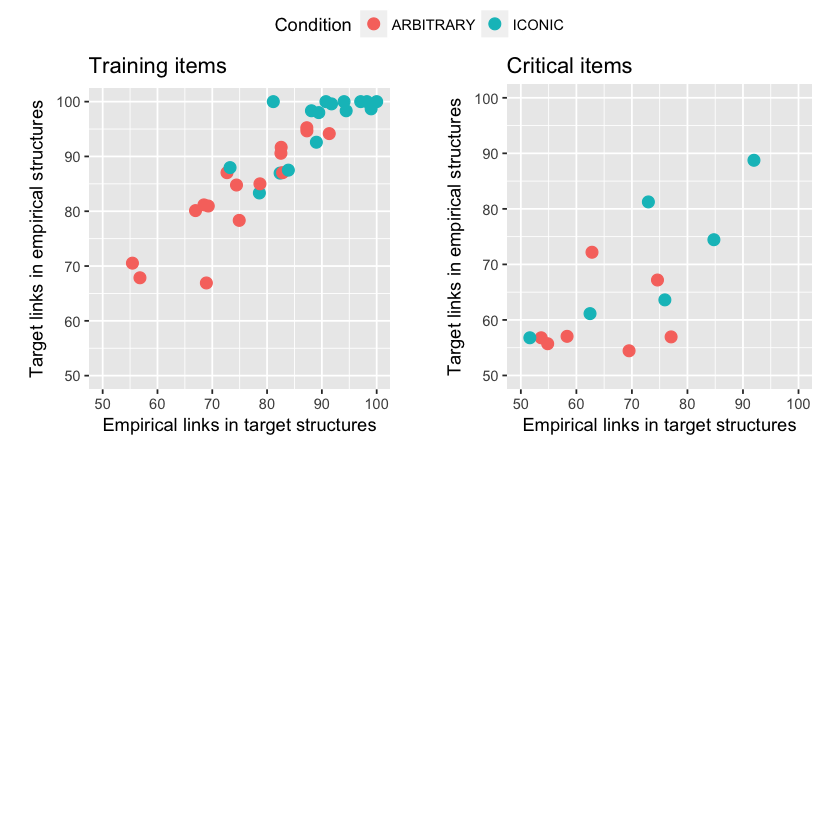

In [13]:
d <- aggregate(empirical_in_target ~Point.Pattern+ +StimType +Condition + Stage,  data = astradata, FUN = mean)
#head(d)
d2 <- aggregate(target_in_empirical ~ Point.Pattern+ Condition + Stage, data = astradata, FUN = mean)
d3 <- aggregate(mst_in_empirical ~ Point.Pattern+ Condition + Stage, data = astradata, FUN = mean)
d4 <- aggregate(empirical_in_mst ~ Point.Pattern+ Condition + Stage, data = astradata, FUN = mean)

#head(d3)

#nrow(d)
#nrow(d2)
 d <- merge(d,d2, by = c("Point.Pattern","Condition", "Stage"))
 d <- merge(d,d3, by = c("Point.Pattern","Condition", "Stage"))
 d <- merge(d,d4, by = c("Point.Pattern","Condition", "Stage"))

#add number of points

#head(d)

a <- ggplot(subset(d, Stage == "JOIN" & StimType == "CRITICAL"), aes(x = empirical_in_target, y = target_in_empirical))+ggtitle("Critical items")+ylab("Target links in empirical structures")+xlab("Empirical links in target structures")+xlim(50,100)+ylim(50,100)+geom_point(aes(color = Condition), size = 3)+theme(aspect.ratio=1)
b <- ggplot(subset(d, Stage == "JOIN" & StimType == "NOT_CRITICAL"), aes(x = empirical_in_target, y = target_in_empirical))+ggtitle("Training items")+ylab("Target links in empirical structures")+xlab("Empirical links in target structures")+xlim(50,100)+ylim(50,100)+geom_point(aes(color = Condition), size = 3)+theme(aspect.ratio=1)
c <- ggplot(subset(d, Stage == "JOIN" & StimType == "CRITICAL"), aes(x = empirical_in_mst, y = mst_in_empirical))+ggtitle("Critical items")+ylab("MST links in empirical structures")+xlab("Empirical links in MST structures")+xlim(50,100)+ylim(50,100)+geom_point(aes(color = Condition), size = 3)+theme(aspect.ratio=1)
d <- ggplot(subset(d, Stage == "JOIN" & StimType == "NOT_CRITICAL"), aes(x = empirical_in_mst, y = mst_in_empirical))+ggtitle("Training items")+ylab("MST links in empirical structures")+xlab("Empirical links in MST structures")+xlim(50,100)+ylim(50,100)+geom_point(aes(color = Condition), size = 3)+theme(aspect.ratio=1)

require(ggpubr)
ggarrange(b,a, cols = 2, common.legend = TRUE)

[1] 79.48712

[1] 92.6849

[1] 59.6704

[1] 65.08268

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”

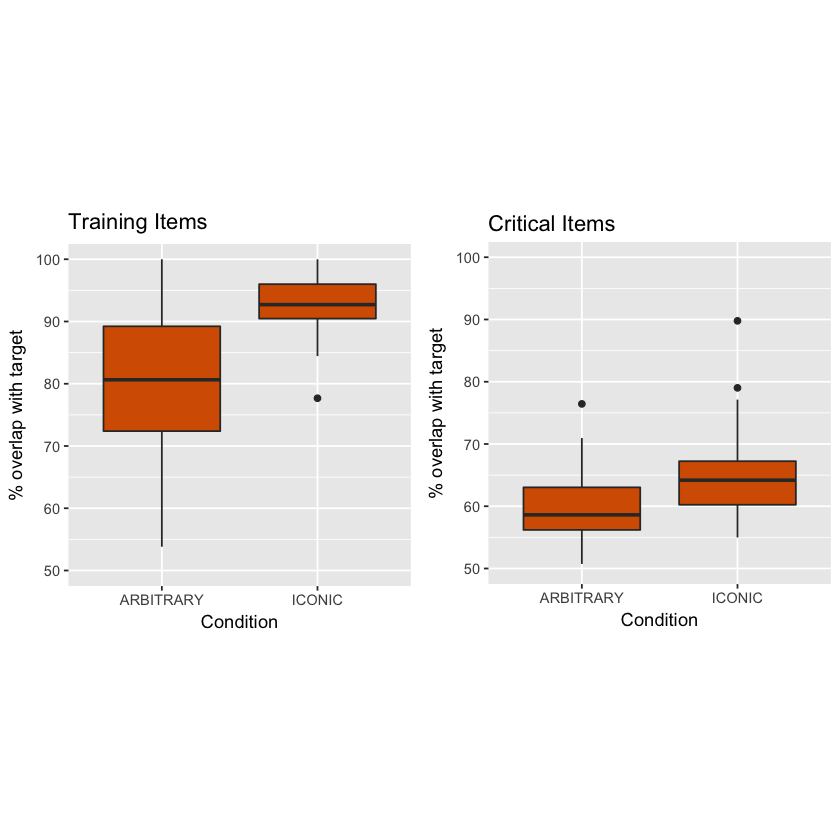

In [14]:
astradata$mean_overlap_with_target <- (astradata$empirical_in_target+astradata$target_in_empirical)/2

d <- aggregate(mean_overlap_with_target ~ pID + Condition + Stage + StimType, data = astradata, FUN = mean)
# head(d)

mean(subset(d, Condition == "ARBITRARY" & StimType == "NOT_CRITICAL")$mean_overlap_with_target)
mean(subset(d, Condition == "ICONIC" & StimType == "NOT_CRITICAL")$mean_overlap_with_target)


mean(subset(d, Condition == "ARBITRARY" & StimType == "CRITICAL")$mean_overlap_with_target)
mean(subset(d, Condition == "ICONIC" & StimType == "CRITICAL")$mean_overlap_with_target)



a <- ggplot(subset(d, Stage == "JOIN" & StimType == "CRITICAL"), aes(x = Condition, y = mean_overlap_with_target))+ggtitle("Critical Items")+ylim(c(50,100))+xlab("Condition")+scale_fill_manual(values = cbPalette)+ylab("% overlap with target")+geom_boxplot(aes(fill = StimType))+theme(aspect.ratio = 1)
b <- ggplot(subset(d, Stage == "JOIN" & StimType == "NOT_CRITICAL"), aes(x = Condition, y = mean_overlap_with_target))+ggtitle("Training Items")+ylim(c(50,100))+xlab("Condition")+scale_fill_manual(values = cbPalette)+ylab("% overlap with target")+geom_boxplot(aes(fill = StimType))+theme(aspect.ratio = 1)

ggarrange(b,a, ncol = 2, legend = FALSE)

### Overlap model

In [15]:
astradata$StimType <- relevel(astradata$StimType, ref = "NOT_CRITICAL")
astradata$Condition <- relevel(astradata$Condition, ref = "ARBITRARY")

### non-critical items

In [16]:
#training items
#sum coding
dat <- subset(astradata, Stage == "JOIN" & StimType == "NOT_CRITICAL")
contrasts(dat$Condition) = contr.sum(2)
contrasts(dat$Condition)


m <- lmer(mean_overlap_with_target ~ Condition + (1|pID) + (1+Condition|Point.Pattern) , data = dat)
n <- lmer(mean_overlap_with_target ~ (1|pID)+ (1+Condition|Point.Pattern), data = dat)
summary(m)
anova(n,m)

ARBITRARY,1
ICONIC,-1


Linear mixed model fit by REML ['lmerMod']
Formula: mean_overlap_with_target ~ Condition + (1 | pID) + (1 + Condition |  
    Point.Pattern)
   Data: dat

REML criterion at convergence: 5425.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8418 -0.3313  0.1367  0.5135  2.6966 

Random effects:
 Groups        Name        Variance Std.Dev. Corr
 pID           (Intercept)  41.96    6.477       
 Point.Pattern (Intercept)  36.89    6.073       
               Condition1   12.36    3.515   0.54
 Residual                  237.84   15.422       
Number of obs: 640, groups:  pID, 80; Point.Pattern, 16

Fixed effects:
            Estimate Std. Error t value
(Intercept)   85.967      1.791   48.00
Condition1    -6.645      1.294   -5.14

Correlation of Fixed Effects:
           (Intr)
Condition1 0.309 

refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
n,6,5461.213,5487.982,-2724.607,5449.213,NA,NA,NA
m,7,5444.939,5476.170,-2715.470,5430.939,18.27357,1,1.913431e-05


### critical items

In [17]:

#sum coding
dat <- subset(astradata, Stage == "JOIN" & StimType == "CRITICAL")
contrasts(dat$Condition) = contr.sum(2)
contrasts(dat$Condition)


m <- lmer(mean_overlap_with_target ~ Condition + (1|pID) + (1+Condition|Point.Pattern) , data = dat)
n <- lmer(mean_overlap_with_target ~ (1|pID)+ (1+Condition|Point.Pattern), data = dat)
summary(m)
anova(n,m)


ARBITRARY,1
ICONIC,-1


Linear mixed model fit by REML ['lmerMod']
Formula: mean_overlap_with_target ~ Condition + (1 | pID) + (1 + Condition |  
    Point.Pattern)
   Data: dat

REML criterion at convergence: 5472.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.6730 -0.6353 -0.0683  0.4980  3.1808 

Random effects:
 Groups        Name        Variance Std.Dev. Corr 
 pID           (Intercept)   8.503   2.916        
 Point.Pattern (Intercept) 172.335  13.128        
               Condition1   16.451   4.056   -1.00
 Residual                  283.949  16.851        
Number of obs: 640, groups:  pID, 80; Point.Pattern, 8

Fixed effects:
            Estimate Std. Error t value
(Intercept)   62.377      4.700  13.271
Condition1    -2.706      1.614  -1.676

Correlation of Fixed Effects:
           (Intr)
Condition1 -0.877

refitting model(s) with ML (instead of REML)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
n,6,5492.986,5519.754,-2740.493,5480.986,NA,NA,NA
m,7,5492.306,5523.536,-2739.153,5478.306,2.679711,1,0.1016342


# Visualise responses

In [18]:
#add point coordinates to dataframe
points <- read.csv("point_coords.csv")
astradata <- merge(astradata, points, by = "Point.Pattern")

In [19]:
#function for parsing the Responses into a Matrix, keeping lower triangle only 
parse_to_lowtri <- function(s) {
    s <- as.character(s)
    s <- substring(s,3,nchar(s)-2) #strip leading and trailing [[ ]]
    r <- unlist(strsplit(s, "]\\[")) #split by "][" and unlist to vector
    s_mat <- matrix(as.numeric(unlist(strsplit(r,""))), nrow = length(r)) #to matrix, splitting each row into cols
    s_mat[upper.tri(s_mat, diag = TRUE)] <- NA #upper triangle and diagonal to "NA
    return(s_mat)
}

In [20]:
#function for getting segments into usable format for ggplot
get_segments <- function(xy,m) {
    #empty data frame to hold segment info
    segments <- data.frame(startx= numeric(0), starty= integer(0), endx = integer(0), endy = integer(0), width = integer(0))

    #populate segments by iterating over matrix
    for(i in seq(1:nrow(m))) {
        for(j in seq(1:ncol(m))){
            if(is.na(m[i,j])== FALSE) {
                if(m[i,j]!= 0) {
                    #i and j are matrix positions
                    startx <- xy[i,"x"]
                    starty <- xy[i,"y"]
                    endx <- xy[j,"x"]
                    endy <- xy[j,"y"]
                    width <-m[i,j]
                    segments <-rbind(segments, cbind(startx,starty,endx,endy,width))
                }
            }
        }
    }
    return(segments)
}

In [21]:
#plotting aggregated responses per item

for(n in seq(1:nrow(points))) {
    
    pattern <- as.character(points[n,"Point.Pattern"])

    #currently plotting arbitrary condition - change to "ICONIC" to plot responses in iconic condition 
    pp <- subset(astradata,Condition == "ARBITRARY" & Stage == "JOIN" & Point.Pattern == pattern)
    n <- nrow(pp)

    matrices <- lapply(pp$Response, parse_to_lowtri) #put parsed matrices into a list
    m <- Reduce('+',matrices) #reduce the list of matrices by summing 
    m <- round(m*100/n)*0.1

    #get coordinates
    xcoords <- as.character(subset(points, Point.Pattern == pattern)$Xcoords)
    ycoords <- as.character(subset(points, Point.Pattern == pattern)$Ycoords)

    xcoords <- unlist(strsplit(xcoords, ","))
    ycoords <- unlist(strsplit(ycoords, ","))

    xy <- as.data.frame(cbind(as.numeric(xcoords),-as.numeric(ycoords)))
    colnames(xy) <- c("x", "y")
    
    #get segments to draw - response, mst and target iconic image
    segments <- get_segments(xy,m)
    mst_segments <- get_segments(xy,parse_to_lowtri(pp$MST[1]))
    target_segments <- get_segments(xy,parse_to_lowtri(pp$Target[1]))

    #plot points
    p <- ggplot(xy, aes(x = x, y = y),lend = 0)+geom_point()
    
    #add line segments to plot - comment in/out as appropriate: 
    
    #add responses to plot
    
    for(i in seq(1:nrow(segments))) {
    p <- p +geom_segment(x = segments[i,"startx"], 
                         y = segments[i,"starty"], 
                         xend = segments[i,"endx"], 
                         yend = segments[i,"endy"],
                         lineend = "round", 
                         size = segments[i,"width"],
                         colour = "navy")
    }

    #add MST to plot
    
    for(i in seq(1:nrow(mst_segments))) {
    p <- p +geom_segment(x = mst_segments[i,"startx"], 
                         y = mst_segments[i,"starty"], 
                         xend = mst_segments[i,"endx"], 
                         yend = mst_segments[i,"endy"],
                         lineend = "round", 
                         linetype = "dotted",
                         size = 1,
                         colour = "gold")
    }
    
    #add iconic target to plot
    
        for(i in seq(1:nrow(target_segments))) {
    p <- p +geom_segment(x = target_segments[i,"startx"], 
                         y = target_segments[i,"starty"], 
                         xend = target_segments[i,"endx"], 
                         yend = target_segments[i,"endy"],
                         lineend = "round", 
                         linetype = "dotted",
                         size = 1,
                         colour = "magenta")
    }
    

    p <- p+coord_fixed()+ggtitle(pattern)+ylim(c(-500,0))+xlim(c(300,900))

    p <- p+theme(
        aspect.ratio = 1,
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        panel.grid.minor = element_blank(),
        panel.grid.major = element_blank(),
            )


    ggsave(paste(pattern, ".jpg", sep = ""), plot = p)
    
}




Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Warning message:
“Removed 1 rows containing missing values (geom_point).”Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Warning message:
“Removed 2 rows containing missing values (geom_point).”Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
